# Datascience module version
Like any other 'maintained' package, the datascience package is constantly revised. 

Version 0.17.6 had some changes to the API, which breaks some of the examples. We therefore need to make sure we are using a version smaller than 0.17.6 and might have to downgrade to version 0.17.5. 

We do this by 'escaping' jupyter and run the python package manager "pip" from the 'shell'. 

We run the command:

`!pip install --user datascience==0.17.5`

The command installs a specific version (0.17.5) of datascience in user space.

Afterwards, we have to restart the kernel and then can verify the version of datascience we are using with

```python
import datascience
datascience.__version__
````

In [1]:
!pip install --user datascience==0.17.5

  Obtaining dependency information for datascience==0.17.5 from https://files.pythonhosted.org/packages/8a/7e/b13c1d691ffc057c7e21bb15d7fcd7c99118e0fe73a6e4b39f35c1f70936/datascience-0.17.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 34.6 MB/s eta 0:00:00


In [1]:
import datascience
datascience.__version__

'0.17.5'

In [13]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples
- read in the 'data/baby.csv' file
- look at the data
- subset to `Birth Weight` and `Maternal Smoker` columns
- How many babies are in the smoker and the nonsmoker group?
- Make a histogram showing the weight distribution of babies
- Make a histogram with the distribution of the smoker babies and the non-smoker babies

In [17]:
births = Table().read_table('data/baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [20]:
smoking_and_weights = births.select('Maternal Smoker', 'Birth Weight')

In [22]:
smoking_and_weights.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


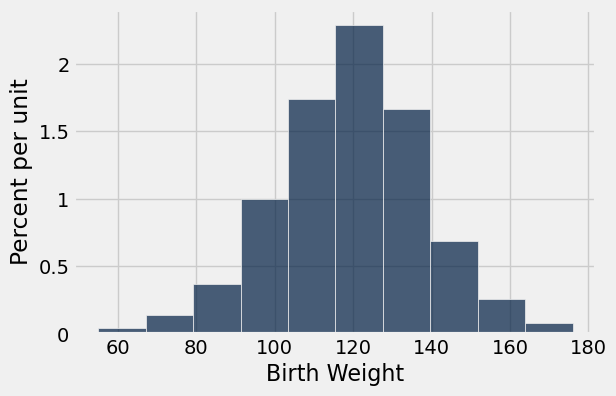

In [25]:
smoking_and_weights.hist('Birth Weight')

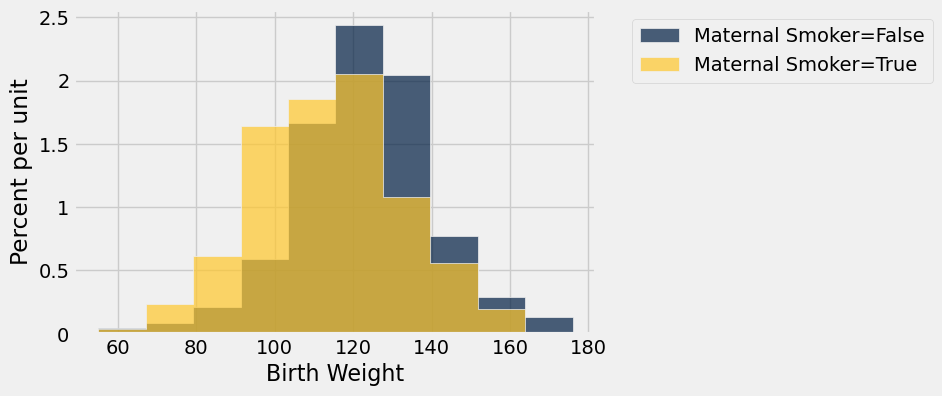

In [26]:
smoking_and_weights.hist('Birth Weight', group='Maternal Smoker')

--- 

back to slides

---

# Test Statistic

**Question**: What values of our statistic are in favor of the alternative: positive or negative?

- compute the average birthweights of smokers and nonsmokers
- compute the difference between the two groups
- create a function that accepts 
    - a `table`, a `group label`, and a `variable label` and
    - computes the difference in the average of the variable in the two groups

In [43]:
weight_averages = smoking_and_weights.group('Maternal Smoker', np.average)
#weight_averages = weight_averages.column('Birth Weight average')
weight_averages

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [37]:
weight_averages.item(1) - weight_averages.item(0)

-9.266142572024918

In [46]:
def difference_of_means(table, label, group_label):
    """Takes: 
        - name of table
        - column label of numerical variable
        - column label of group-label variable
    Returns: Difference of means of the two groups"""
    subset = table.select(label, group_label)
    averages = subset.group(group_label, np.average).column(1)
    difference_in_averages = averages[1] - averages[0]
    return difference_in_averages

In [47]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.2661425720249184

---
back to slides

----

# Random Permutation (Shuffling)
- remember the [sample function](http://www.data8.org/datascience/reference-nb/datascience-reference.html#tbl.sample())
- by sampling with replacement, we can shuffle the order of a column
- shuffle the table and attach the shuffled `Letter` as a new column

In [ ]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

# Simulation Under Null Hypothesis
- Shuffle the smoking/nonsmoking labels
- attach the shuffled labels to the `smoking_and_birthweight` table
- calculate the difference of means for the original labels
- calculate the difference of means for the shuffled labels

In [ ]:
smoking_and_birthweight

# Permutation Test
- create a function that shuffles the labels and calculates the difference of means
- simulate 2500 times. This should yield an array with 2500 differences
- create a table and plot the histogram

In [ ]:
def one_simulated_difference(table, label, group_label):
    """Takes: 
        - name of table
        - column label of numerical variable
        - column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')

In [ ]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

In [ ]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

**Question:**
Can we conclude causality?